## GROUP 4
- Lorenza Di Mauro
- Raffaele Sannino
- Maria Zampella  

**DATA SET**


https://archive.ics.uci.edu/ml/datasets/air+quality

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#MARIELLA PATH
dataset_path = r'/content/drive/MyDrive/lstm_ds/AirQualityUCI/AirQualityUCI.xlsx'
dataset = pd.read_excel(dataset_path)
dataset

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [4]:
# dataset_path = r'/content/drive/MyDrive/AirQualityUCI/AirQualityUCI.xlsx'
# dataset = pd.read_excel(dataset_path)
# dataset

In [5]:
dataset.describe(include = 'all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357,9357,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
unique,391,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2004-09-21 00:00:00,18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,24,390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2004-03-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2005-04-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,NaN,NaN,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,NaN,NaN,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,NaN,NaN,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275


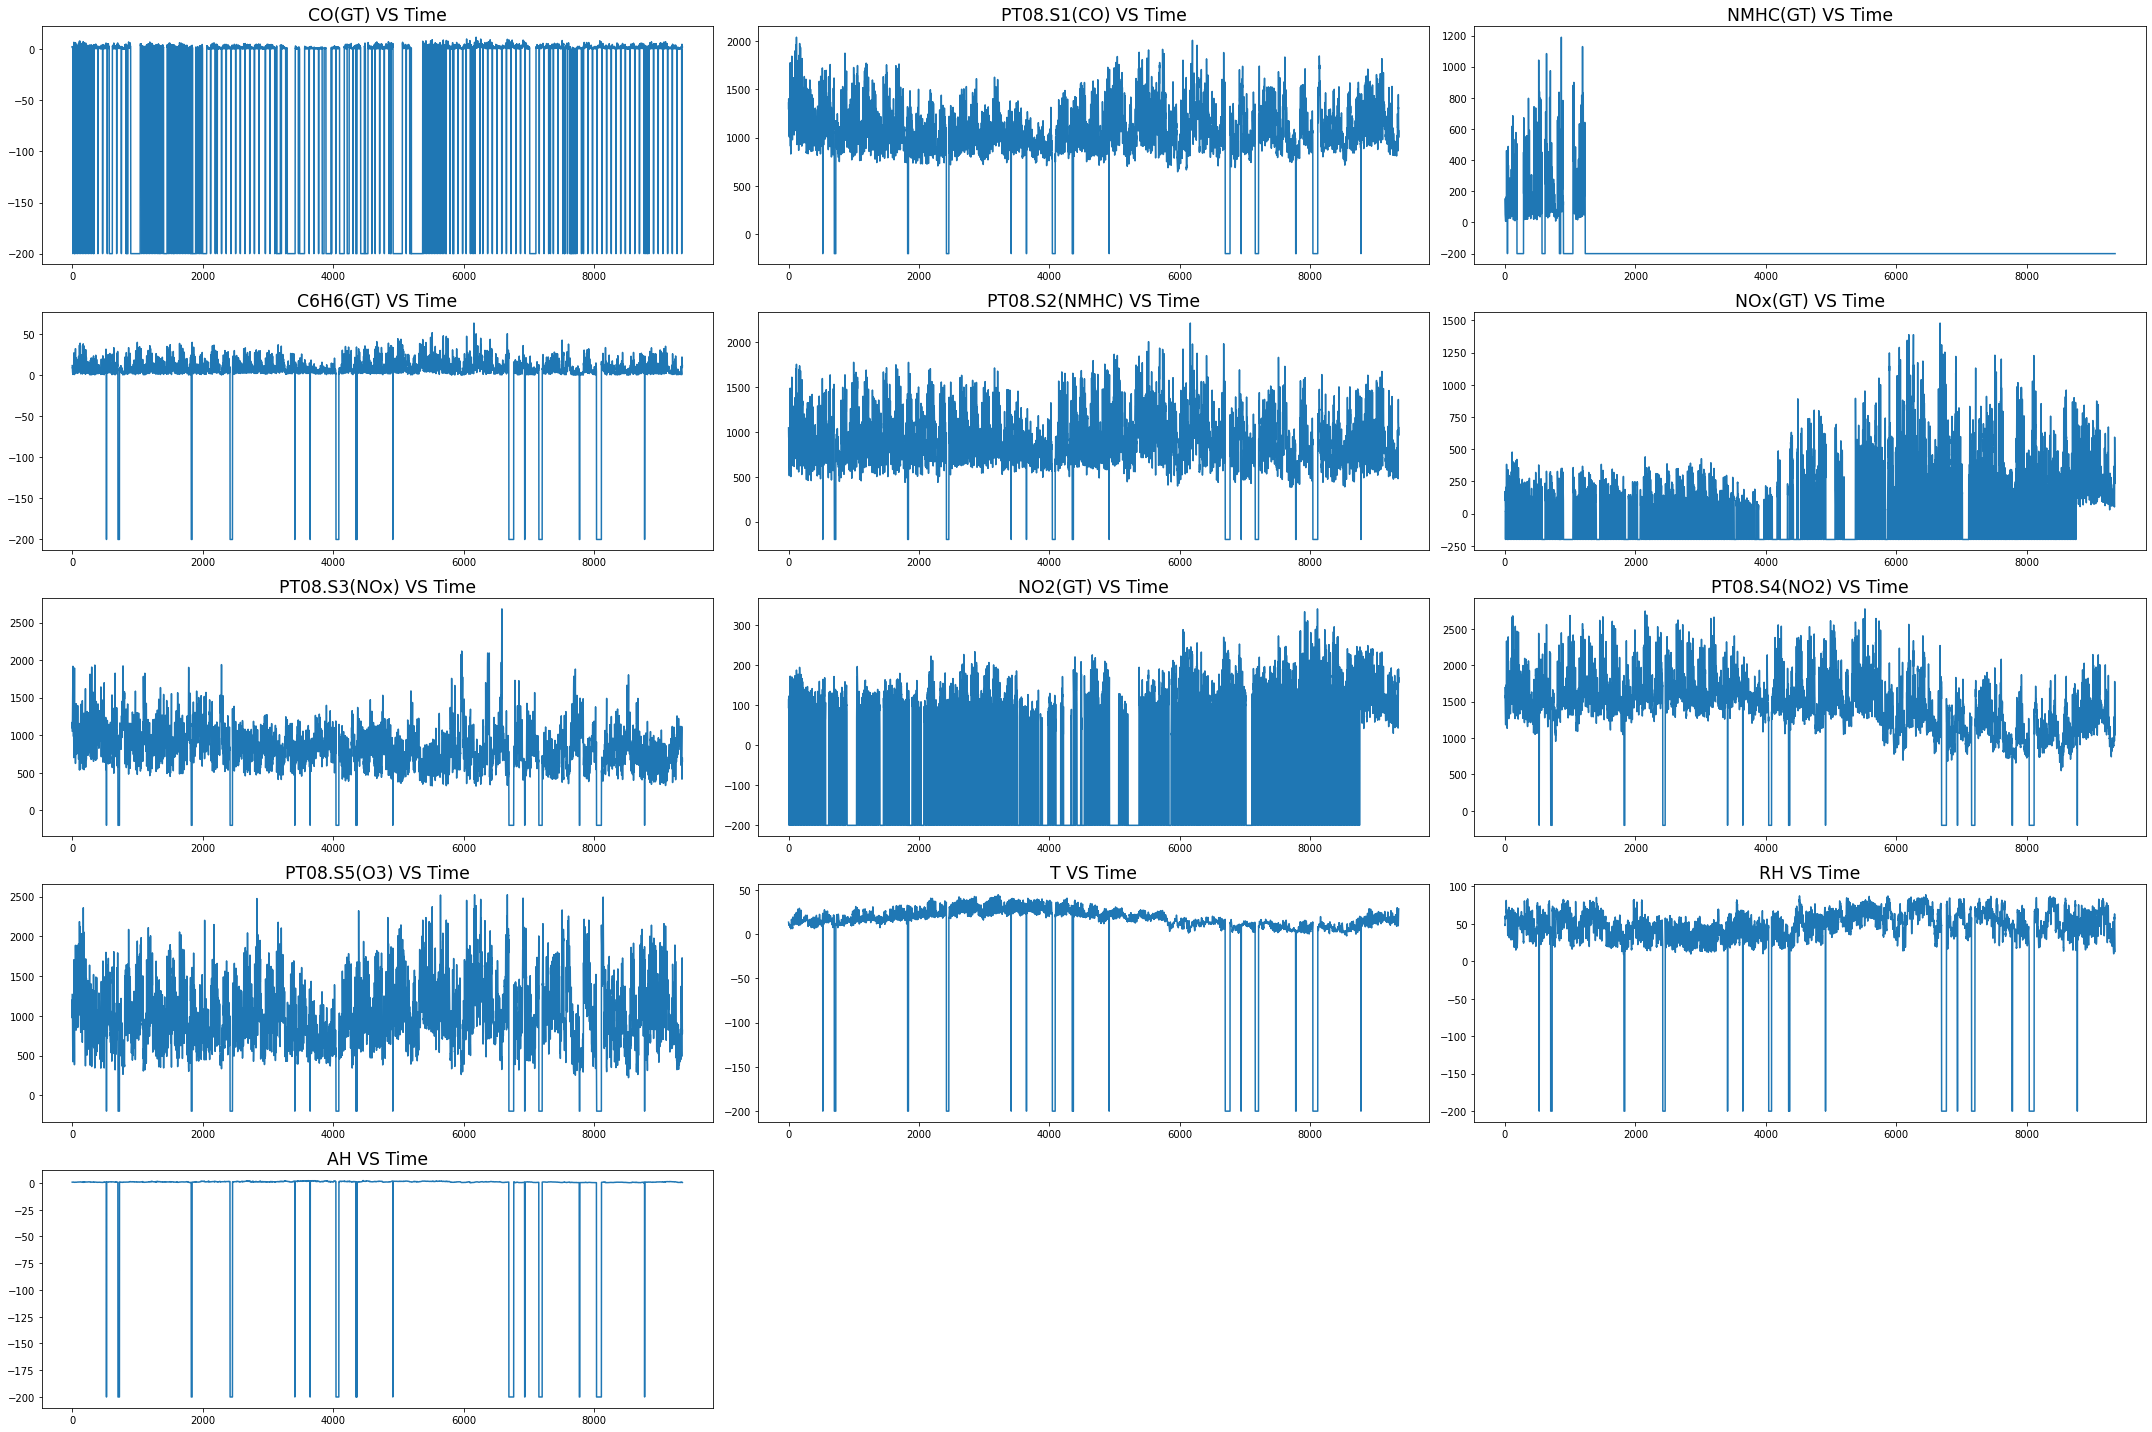

In [6]:
feat = list(dataset.columns)
feat = feat[2:]
a = len(feat)
# We decide to use 4 columns and 4 rows
c = 1
fig = plt.figure(figsize=(30,20))
for i in feat:
    plt.subplot(5, 3, c)
    plt.title(str(i) + ' VS Time', fontsize = 'xx-large')
    #plt.ylabel(i)
    # plt.xlabel('Date')
    plt.plot(dataset[i])
    c = c + 1

plt.tight_layout()
plt.show()

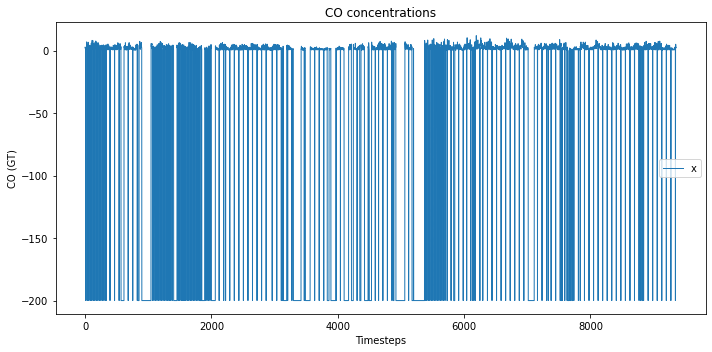

In [7]:
plt.figure(figsize=(10,5))
plt.plot(dataset.index, dataset['CO(GT)'], label='x', 
         linewidth=1)

# Add title and labels
plt.title('CO concentrations')
plt.xlabel('Timesteps')
plt.ylabel('CO (GT)')

# Add legend
plt.legend()

# Auto space
plt.tight_layout()

# Display plot
plt.show()

In [8]:
print(dataset.iloc[0,4])
len(dataset)

150


9357

In [9]:
dataset = dataset.where(dataset != -200)
dataset

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150.0,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112.0,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88.0,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80.0,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51.0,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,NaN,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,NaN,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,NaN,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,NaN,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [10]:
# We print the type of the columns because we want to analyze if there are some categorical variables.

for column in dataset.columns:
    print(column, ':' , dataset[column].dtype)

# In this case all the columns are numerical one (except the first two that represents the time stamp).

Date : datetime64[ns]
Time : object
CO(GT) : float64
PT08.S1(CO) : float64
NMHC(GT) : float64
C6H6(GT) : float64
PT08.S2(NMHC) : float64
NOx(GT) : float64
PT08.S3(NOx) : float64
NO2(GT) : float64
PT08.S4(NO2) : float64
PT08.S5(O3) : float64
T : float64
RH : float64
AH : float64


In [11]:
#OBSERVE THE NUMBER FOR MISSING DATA FOR EACH COLUMN
print(dataset.isnull().sum())

print('Total number of rows = ', len(dataset) )

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64
Total number of rows =  9357


We notice that the column NMHC contains a considerable number of Null values, so for our analysis we decide to remove this column.

In [12]:
del dataset['NMHC(GT)']

By looking at the number of Null values for columns we noticed that more columns have the same number, so we thought that maybe there are some rows (that is: some specific hours for some specific days) in which data were not properly collected. Let's check if there are some rows with more than one null value 

In [13]:
# for example we select the 'AH' column. And we selct only the rows which has NaN for that column.
# print(dataset[dataset['AH']. isnull()])

# Now we visualize the number on NaN for each column for this restricted dataset

print(dataset[dataset['AH']. isnull()].isnull().sum())

# so we can say that the 366 rows with NaN are the same for :
# PT08.S1(CO), C6H6(GT), PT08.S2(NMHC), PT08.S3(NOx), PT08.S4(NO2),PT08.S5(O3), T, RH, AH (IT LOOKS THAT THESE ALMOST-NULL ROWS ARE CONSECUTIVES)

Date               0
Time               0
CO(GT)            36
PT08.S1(CO)      366
C6H6(GT)         366
PT08.S2(NMHC)    366
NOx(GT)           44
PT08.S3(NOx)     366
NO2(GT)           44
PT08.S4(NO2)     366
PT08.S5(O3)      366
T                366
RH               366
AH               366
dtype: int64


We decided not to discarge the rows containing NaN values, instead we substitute them with means.

In [14]:
dataset = dataset.fillna(dataset.mean())
dataset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [15]:
# Let's check if we replaced all the NaN values
nan_in_df = dataset.isnull().values.any()
nan_in_df

False

In [16]:
dataset.describe(include = 'all').T

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
Date,9357,391,2004-09-21 00:00:00,24,2004-03-10,2005-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time,9357,24,18:00:00,390,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CO(GT),9357.0,NaN,NaN,NaN,NaT,NaT,2.15275,1.316068,0.1,1.2,2.15275,2.6,11.9
PT08.S1(CO),9357.0,NaN,NaN,NaN,NaT,NaT,1099.707856,212.796116,647.25,941.25,1074.5,1221.25,2039.75
C6H6(GT),9357.0,NaN,NaN,NaN,NaT,NaT,10.082993,7.302474,0.149048,4.591495,8.593367,13.636091,63.741476
PT08.S2(NMHC),9357.0,NaN,NaN,NaN,NaT,NaT,939.029205,261.557856,383.25,742.5,923.25,1104.75,2214.0
NOx(GT),9357.0,NaN,NaN,NaN,NaT,NaT,246.881252,193.419417,2.0,112.0,229.0,284.2,1479.0
PT08.S3(NOx),9357.0,NaN,NaN,NaN,NaT,NaT,835.370973,251.741784,322.0,665.5,817.5,960.25,2682.75
NO2(GT),9357.0,NaN,NaN,NaN,NaT,NaT,113.075515,43.911095,2.0,85.9,113.075515,133.0,339.7
PT08.S4(NO2),9357.0,NaN,NaN,NaN,NaT,NaT,1456.143486,339.365351,551.0,1241.5,1456.143486,1662.0,2775.0


Now we can plot the CO concentrations and show that the negative values (-200) are no longer there.

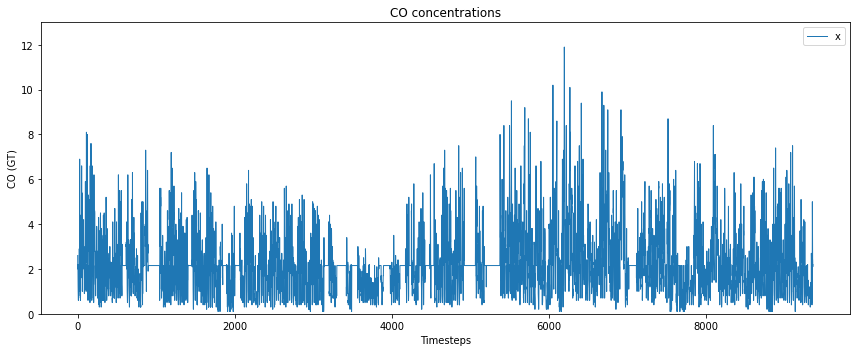

In [17]:
plt.figure(figsize=(12,5))
plt.plot(dataset.index, dataset['CO(GT)'], label='x', 
         linewidth=1)

# Add title and labels
plt.title('CO concentrations')
plt.xlabel('Timesteps')
plt.ylabel('CO (GT)')
plt.ylim(0,13)


# Add legend
plt.legend()

# Auto space
plt.tight_layout()

# Display plot
plt.show()

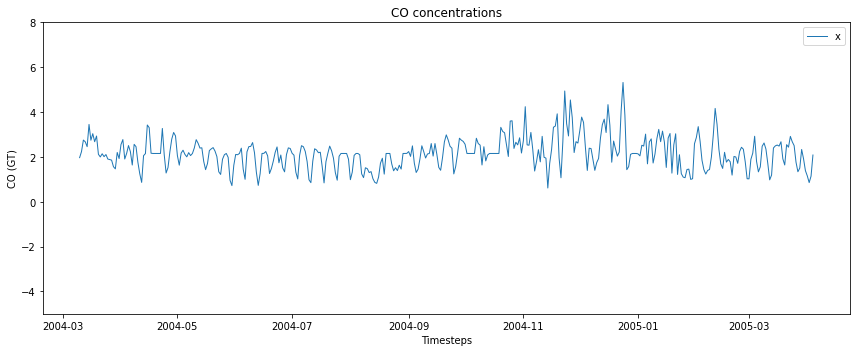

In [18]:
# We want to see the behaviour of CO per day. So we need first to group the dara (we calculate the mean of CO per day and then we plot it)

df = dataset.groupby('Date').mean()

plt.figure(figsize=(12,5))
plt.plot(df.index, df['CO(GT)'], label='x', 
         linewidth=1)

# Add title and labels
plt.title('CO concentrations')
plt.xlabel('Timesteps')
plt.ylabel('CO (GT)')
plt.ylim(-5,8)


# Add legend
plt.legend()

# Auto space
plt.tight_layout()

# Display plot
plt.show()

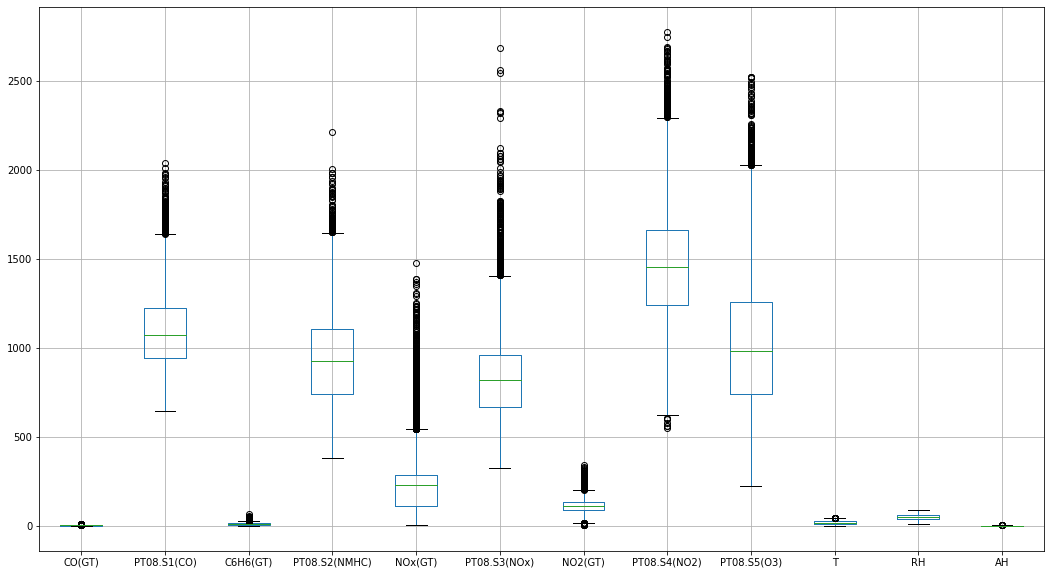

In [19]:
dataset.boxplot(figsize= (18,10))

## CORRELATION MATRIX

In [20]:
# calculate the correlation matrix
corr = dataset.corr()

# plot the correlation matrix (but only half matrix)
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  if sys.path[0] == '':


,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
PT08.S1(CO),0.77,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
C6H6(GT),0.81,0.88,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
PT08.S2(NMHC),0.80,0.89,0.98,nan,nan,nan,nan,nan,nan,nan,nan,nan
NOx(GT),0.76,0.62,0.62,0.60,nan,nan,nan,nan,nan,nan,nan,nan
PT08.S3(NOx),-0.61,-0.77,-0.74,-0.80,-0.56,nan,nan,nan,nan,nan,nan,nan
NO2(GT),0.65,0.56,0.54,0.56,0.76,-0.57,nan,nan,nan,nan,nan,nan
PT08.S4(NO2),0.56,0.68,0.77,0.78,0.21,-0.54,0.14,nan,nan,nan,nan,nan
PT08.S5(O3),0.76,0.90,0.87,0.88,0.69,-0.80,0.63,0.59,nan,nan,nan,nan
T,0.02,0.05,0.20,0.24,-0.24,-0.15,-0.17,0.56,-0.03,nan,nan,nan


## NORMALIZATION
Using min-max normalization:

In [21]:
#Normalising data
from sklearn.preprocessing import MinMaxScaler

df = dataset.drop(columns = ['Date', 'Time'])
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df.values)

'''df = dataset.drop(columns = ['Date', 'Time'])
df = (df-df.min())/(df.max()-df.min())'''
df = pd.DataFrame(df_scaled, columns = df.columns)
df

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,0.211864,0.511849,0.184498,0.361737,0.111036,0.311024,0.328694,0.513040,0.454654,0.333333,0.499057,0.280046
1,0.161017,0.463196,0.145428,0.312167,0.068382,0.360796,0.266509,0.453125,0.326382,0.326882,0.484287,0.264279
2,0.177966,0.542011,0.139148,0.303701,0.087339,0.346500,0.331655,0.451214,0.370588,0.296774,0.563168,0.276374
3,0.177966,0.522980,0.142780,0.308617,0.115098,0.326168,0.355345,0.464366,0.426741,0.277419,0.638906,0.294198
4,0.127119,0.448833,0.100156,0.247030,0.087339,0.374034,0.337578,0.422212,0.386228,0.280645,0.633564,0.295215
...,...,...,...,...,...,...,...,...,...,...,...,...
9352,0.254237,0.478995,0.210411,0.392189,0.318009,0.091708,0.556115,0.370166,0.654936,0.510753,0.252357,0.279592
9353,0.194915,0.370018,0.176218,0.351632,0.237847,0.119348,0.524726,0.320369,0.455306,0.563978,0.182904,0.257621
9354,0.194915,0.355296,0.192248,0.371023,0.197021,0.119136,0.511401,0.310139,0.378408,0.619355,0.115336,0.222820
9355,0.169492,0.255117,0.147787,0.315308,0.157414,0.160754,0.455138,0.220324,0.238406,0.650000,0.054997,0.160865


In [22]:
df.describe(include = 'all').T

,count,mean,std,min,25%,50%,75%,max
CO(GT),9357.0,0.173962,0.111531,0.0,0.093220,0.173962,0.211864,1.0
PT08.S1(CO),9357.0,0.324925,0.152816,0.0,0.211131,0.306822,0.412208,1.0
C6H6(GT),9357.0,0.156213,0.114832,0.0,0.069858,0.132788,0.212086,1.0
PT08.S2(NMHC),9357.0,0.303580,0.142869,0.0,0.196231,0.294961,0.394101,1.0
NOx(GT),9357.0,0.165796,0.130954,0.0,0.074475,0.153690,0.191063,1.0
PT08.S3(NOx),9357.0,0.217461,0.106636,0.0,0.145505,0.209891,0.270359,1.0
NO2(GT),9357.0,0.328918,0.130030,0.0,0.248445,0.328918,0.387918,1.0
PT08.S4(NO2),9357.0,0.406989,0.152592,0.0,0.310477,0.406989,0.499550,1.0
PT08.S5(O3),9357.0,0.348335,0.169701,0.0,0.226241,0.330835,0.449332,1.0
T,9357.0,0.434754,0.186202,0.0,0.299462,0.433871,0.558602,1.0


## Obiettivo
Obiettivo: prevedere la quantità di CO considerando i 2 giorni precedenti (ovvero 24*2).
Devo operare in questo modo:
- dividere il dataset in 2 tensori: X = tensore (:, )
- splittare il dataset in train, validation e test. Facciamo 7500 di train e 1500 di test. Al dataset di train applicheremo un validation split di 0.2;

In [23]:
lookback = 24*2
step = 1
delay = 24
batch_size = 1
train_size = int(len(df)*0.85)
test_size = len(df) - train_size
print(train_size, test_size)

7953 1404


In [24]:
#Creating a window for previous data
def to_supervised(train, lookback):
  X = []
  Y = []
  for i in range(lookback, len(train)):
    X.append(train.iloc[i-lookback:i,:])
    Y.append(train.iloc[i,0:1])
    
  return X,Y

In [25]:
X, Y = to_supervised(train = df, lookback = lookback)
X = np.array(X)
Y = np.array(Y)
print('Y' ,Y.shape)
print('X' ,X.shape)

Y (9309, 1)
X (9309, 48, 12)


In [26]:
#Splitting the dataset
X_train, X_test = X[:train_size,] , X[train_size:,]
print('X_train' ,X_train.shape)
print('X_test' ,X_test.shape)

Y_train, Y_test = Y[:train_size,0:1] , Y[train_size:,0:1]
print('Y_train' ,Y_train.shape)
print('Y_test' ,Y_test.shape)

# per ogni elemento che voglio prevedere (Y) ho a disposizion come un mini dataset 
# fatto dalle 48 osservazioni precedenti, quindi di size 48*12 (ho 12 colonne)

X_train (7953, 48, 12)
X_test (1356, 48, 12)
Y_train (7953, 1)
Y_test (1356, 1)


In [27]:
#Importing LSTM model
from keras.models import Sequential
from keras.layers import Dense, Dropout,LSTM
model_lstm_1 = Sequential()

model_lstm_1.add(LSTM(units = 32, return_sequences = False, input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm_1.add(Dense(units = 1))

model_lstm_1.compile(optimizer = 'adam', loss = 'mean_squared_error')
#Train the model
lstm_1 = model_lstm_1.fit(X_train, Y_train, epochs = 50, batch_size = 30, validation_split = 0.2)
lstm_1
model_lstm_1.save('air_pollution_lstm_1.h5')

Epoch 1/50
213/213 [==============================] - 8s 9ms/step - loss: 0.0091 - val_loss: 0.0075
Epoch 2/50
213/213 [==============================] - 1s 6ms/step - loss: 0.0045 - val_loss: 0.0054
Epoch 3/50
213/213 [==============================] - 1s 6ms/step - loss: 0.0038 - val_loss: 0.0050
Epoch 4/50
213/213 [==============================] - 1s 6ms/step - loss: 0.0036 - val_loss: 0.0046
Epoch 5/50
213/213 [==============================] - 1s 6ms/step - loss: 0.0035 - val_loss: 0.0045
Epoch 6/50
213/213 [==============================] - 1s 5ms/step - loss: 0.0033 - val_loss: 0.0044
Epoch 7/50
213/213 [==============================] - 1s 6ms/step - loss: 0.0033 - val_loss: 0.0045
Epoch 8/50
213/213 [==============================] - 1s 6ms/step - loss: 0.0033 - val_loss: 0.0043
Epoch 9/50
213/213 [==============================] - 1s 6ms/step - loss: 0.0033 - val_loss: 0.0043
Epoch 10/50
213/213 [==============================] - 1s 6ms/step - loss: 0.0032 - val_loss: 0.0043

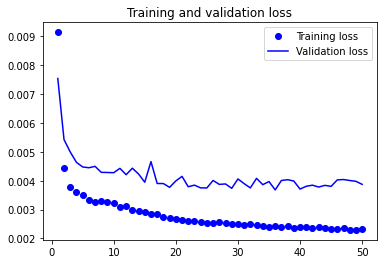

In [28]:
loss = lstm_1.history['loss']
val_loss = lstm_1.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [29]:
model_lstm_dropout_1 = Sequential()

model_lstm_dropout_1.add(LSTM(units = 32, return_sequences = False, input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm_dropout_1.add(Dropout(0.2))
model_lstm_dropout_1.add(Dense(units = 1))

model_lstm_dropout_1.compile(optimizer = 'adam', loss = 'mean_squared_error')

#Train the model
lstm_dropout_1 = model_lstm_dropout_1.fit(X_train, Y_train, epochs = 50, batch_size = 30, validation_split = 0.2)
lstm_dropout_1
model_lstm_dropout_1.save('air_pollution_lstm_dropout_1.h5')

Epoch 1/50
213/213 [==============================] - 3s 8ms/step - loss: 0.0103 - val_loss: 0.0075
Epoch 2/50
213/213 [==============================] - 1s 6ms/step - loss: 0.0057 - val_loss: 0.0070
Epoch 3/50
213/213 [==============================] - 1s 6ms/step - loss: 0.0049 - val_loss: 0.0052
Epoch 4/50
213/213 [==============================] - 1s 6ms/step - loss: 0.0043 - val_loss: 0.0056
Epoch 5/50
213/213 [==============================] - 1s 5ms/step - loss: 0.0040 - val_loss: 0.0046
Epoch 6/50
213/213 [==============================] - 1s 6ms/step - loss: 0.0039 - val_loss: 0.0045
Epoch 7/50
213/213 [==============================] - 1s 6ms/step - loss: 0.0036 - val_loss: 0.0043
Epoch 8/50
213/213 [==============================] - 1s 6ms/step - loss: 0.0036 - val_loss: 0.0043
Epoch 9/50
213/213 [==============================] - 1s 6ms/step - loss: 0.0037 - val_loss: 0.0043
Epoch 10/50
213/213 [==============================] - 1s 6ms/step - loss: 0.0035 - val_loss: 0.0042

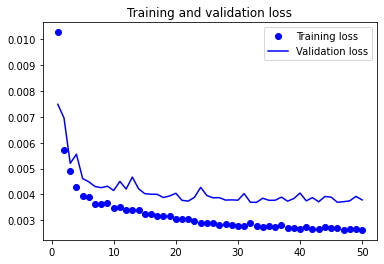

In [30]:
loss = lstm_dropout_1.history['loss']
val_loss = lstm_dropout_1.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [31]:
Y_pred = model_lstm_1.predict(X_test)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, Y_pred)

rmse = np.sqrt(mse)
rmse

43/43 [==============================] - 0s 3ms/step


0.05467070727675954

In [32]:
print(Y_pred.shape, Y_test.shape, df.shape)

(1356, 1) (1356, 1) (9357, 12)


In [33]:
#Scaling back to the original scale
df_test_truncated = df.iloc[train_size+lookback:,1:]
#print(df_truncated.shape)
#print('Y_pred',Y_pred.shape)
df_test_with_Y_predicted = np.concatenate((df_test_truncated.iloc[:,:],Y_pred), axis =1)
df_test_with_Y_predicted = pd.DataFrame(df_test_with_Y_predicted)
print(df_test_with_Y_predicted)
print('concat y_pred',Y_pred.shape)
df_test_with_Y_tested = np.concatenate((df_test_truncated.iloc[:,:], Y_test), axis = 1)
df_test_with_Y_tested = pd.DataFrame(df_test_with_Y_tested)
print('concat Y_test', Y_test.shape)
print(df_test_with_Y_predicted.shape)

            0         1         2         3         4         5         6   \
0     0.153321  0.016530  0.073740  0.165796  0.346818  0.328918  0.083858   
1     0.147217  0.010729  0.053667  0.043737  0.366197  0.186852  0.078575   
2     0.166607  0.012793  0.061177  0.049492  0.349253  0.208765  0.090715   
3     0.181149  0.017605  0.077154  0.064252  0.325320  0.244596  0.103080   
4     0.226750  0.035811  0.126314  0.118280  0.278725  0.388807  0.128597   
...        ...       ...       ...       ...       ...       ...       ...   
1351  0.478995  0.210411  0.392189  0.318009  0.091708  0.556115  0.370166   
1352  0.370018  0.176218  0.351632  0.237847  0.119348  0.524726  0.320369   
1353  0.355296  0.192248  0.371023  0.197021  0.119136  0.511401  0.310139   
1354  0.255117  0.147787  0.315308  0.157414  0.160754  0.455138  0.220324   
1355  0.304129  0.185290  0.362693  0.178199  0.140633  0.490672  0.259667   

            7         8         9         10        11  
0     

Devo riordinare le colonne perchè altrimenti non posso applicare l'inverso dello scaling fatto all'inizio 

In [34]:
cols = df_test_with_Y_predicted.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_test_with_Y_predicted = df_test_with_Y_predicted[cols]
df_test_with_Y_tested = df_test_with_Y_tested[cols]

In [35]:
print(df_test_with_Y_tested)

            11        0         1         2         3         4         5   \
0     0.042373  0.153321  0.016530  0.073740  0.165796  0.346818  0.328918   
1     0.042373  0.147217  0.010729  0.053667  0.043737  0.366197  0.186852   
2     0.042373  0.166607  0.012793  0.061177  0.049492  0.349253  0.208765   
3     0.042373  0.181149  0.017605  0.077154  0.064252  0.325320  0.244596   
4     0.059322  0.226750  0.035811  0.126314  0.118280  0.278725  0.388807   
...        ...       ...       ...       ...       ...       ...       ...   
1351  0.254237  0.478995  0.210411  0.392189  0.318009  0.091708  0.556115   
1352  0.194915  0.370018  0.176218  0.351632  0.237847  0.119348  0.524726   
1353  0.194915  0.355296  0.192248  0.371023  0.197021  0.119136  0.511401   
1354  0.169492  0.255117  0.147787  0.315308  0.157414  0.160754  0.455138   
1355  0.177966  0.304129  0.185290  0.362693  0.178199  0.140633  0.490672   

            6         7         8         9         10  
0     

In [36]:
Y_predicted = scaler.inverse_transform(df_test_with_Y_predicted)
Y_tested = scaler.inverse_transform(df_test_with_Y_tested)
Y_predicted = Y_predicted[:,0:1]
Y_tested = Y_tested[:,0:1]
print('Y_tested', Y_tested.shape)
print('Y_predicted', Y_predicted.shape)

Y_tested (1356, 1)
Y_predicted (1356, 1)


In [37]:
mse = mean_squared_error(Y_tested, Y_predicted)

rmse = np.sqrt(mse)
rmse

0.6451143458657626

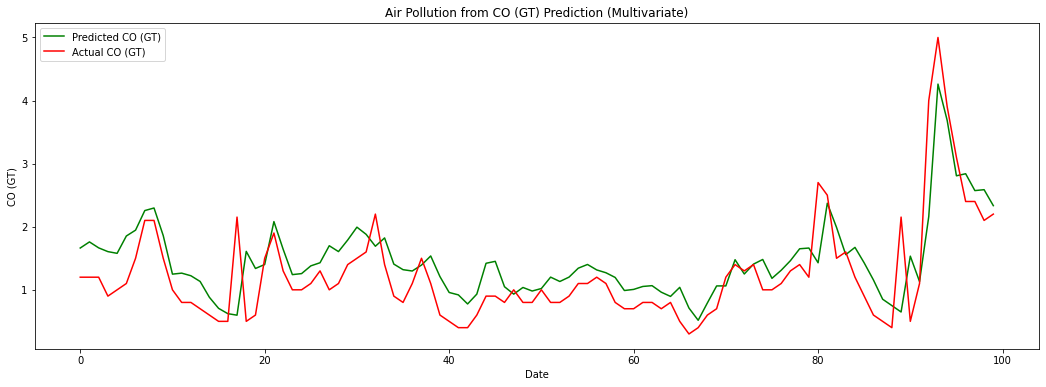

<Figure size 432x288 with 0 Axes>

In [38]:
#Plot the graph between actual vs predicted values
plt.figure(figsize=(18,6))  
plt.plot(Y_predicted[-100:,:], color= 'green',label = 'Predicted CO (GT)')
plt.plot(Y_tested[-100:,:] , color = 'red',label = 'Actual CO (GT)')
plt.title("Air Pollution from CO (GT) Prediction (Multivariate)")
plt.xlabel("Date")
plt.ylabel("CO (GT)")
plt.legend()
plt.show()
plt.savefig('graph.png')

# BIDIRECTIONAL LSTM

In [39]:
import numpy as np
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from keras.datasets import imdb


In [40]:
model = Sequential()
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy']) 

In [41]:
history=model.fit(X_train, Y_train,
          batch_size=30,
          epochs=50,
          validation_split=0.2)
print(history.history['loss'])
print(history.history['accuracy']) 

Epoch 1/50
213/213 [==============================] - 6s 12ms/step - loss: 0.0146 - accuracy: 0.0027 - val_loss: 0.0131 - val_accuracy: 0.0050
Epoch 2/50
213/213 [==============================] - 2s 9ms/step - loss: 0.0073 - accuracy: 0.0027 - val_loss: 0.0093 - val_accuracy: 0.0050
Epoch 3/50
213/213 [==============================] - 2s 9ms/step - loss: 0.0059 - accuracy: 0.0028 - val_loss: 0.0075 - val_accuracy: 0.0050
Epoch 4/50
213/213 [==============================] - 2s 9ms/step - loss: 0.0051 - accuracy: 0.0027 - val_loss: 0.0071 - val_accuracy: 0.0050
Epoch 5/50
213/213 [==============================] - 2s 9ms/step - loss: 0.0046 - accuracy: 0.0028 - val_loss: 0.0058 - val_accuracy: 0.0050
Epoch 6/50
213/213 [==============================] - 2s 9ms/step - loss: 0.0042 - accuracy: 0.0028 - val_loss: 0.0053 - val_accuracy: 0.0050
Epoch 7/50
213/213 [==============================] - 2s 9ms/step - loss: 0.0040 - accuracy: 0.0028 - val_loss: 0.0052 - val_accuracy: 0.0050
Epoch

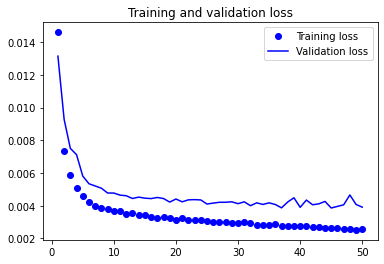

In [42]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

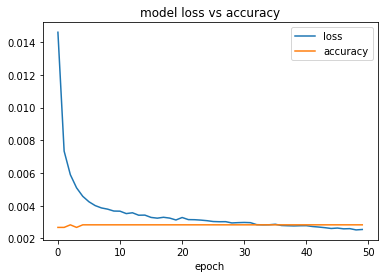

In [43]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['accuracy'])
pyplot.title('model loss vs accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['loss', 'accuracy'], loc='upper right')
pyplot.show() 

In [44]:
Y_pred_b = model.predict(X_test)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, Y_pred_b)

rmse = np.sqrt(mse)
rmse

43/43 [==============================] - 1s 4ms/step


0.0535319516248256

In [45]:
#Scaling back to the original scale
df_test_truncated = df.iloc[train_size+lookback:,1:]
#print(df_truncated.shape)
#print('Y_pred_b',Y_pred_b.shape)
df_test_with_Y_predicted_b = np.concatenate((df_test_truncated.iloc[:,:],Y_pred_b), axis =1)
df_test_with_Y_predicted_b = pd.DataFrame(df_test_with_Y_predicted_b)
print(df_test_with_Y_predicted_b)
print('concat y_pred',Y_pred_b.shape)

# PER df_test non è cambiato nulla (Y_test è sempre la stessa)
# df_test_with_Y_tested = np.concatenate((df_test_truncated.iloc[:,:], Y_test), axis = 1)
# df_test_with_Y_tested = pd.DataFrame(df_test_with_Y_tested)
# print('concat Y_test', Y_test.shape)
# print(df_test_with_Y_predicted.shape)

            0         1         2         3         4         5         6   \
0     0.153321  0.016530  0.073740  0.165796  0.346818  0.328918  0.083858   
1     0.147217  0.010729  0.053667  0.043737  0.366197  0.186852  0.078575   
2     0.166607  0.012793  0.061177  0.049492  0.349253  0.208765  0.090715   
3     0.181149  0.017605  0.077154  0.064252  0.325320  0.244596  0.103080   
4     0.226750  0.035811  0.126314  0.118280  0.278725  0.388807  0.128597   
...        ...       ...       ...       ...       ...       ...       ...   
1351  0.478995  0.210411  0.392189  0.318009  0.091708  0.556115  0.370166   
1352  0.370018  0.176218  0.351632  0.237847  0.119348  0.524726  0.320369   
1353  0.355296  0.192248  0.371023  0.197021  0.119136  0.511401  0.310139   
1354  0.255117  0.147787  0.315308  0.157414  0.160754  0.455138  0.220324   
1355  0.304129  0.185290  0.362693  0.178199  0.140633  0.490672  0.259667   

            7         8         9         10        11  
0     

In [46]:
# Devo riordinare le colonne perchè altrimenti non posso applicare l'inverso dello scaling fatto all'inizio 

cols = df_test_with_Y_predicted_b.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_test_with_Y_predicted_b = df_test_with_Y_predicted_b[cols]

# df_test_with_Y_tested = df_test_with_Y_tested[cols]

In [47]:
Y_predicted_b = scaler.inverse_transform(df_test_with_Y_predicted_b)
# Y_tested = scaler.inverse_transform(df_test_with_Y_tested)
Y_predicted_b = Y_predicted_b[:,0:1]
# Y_tested = Y_tested[:,0:1]
print('Y_tested', Y_tested.shape)
print('Y_predicted_b', Y_predicted_b.shape)

Y_tested (1356, 1)
Y_predicted_b (1356, 1)


In [48]:
mse = mean_squared_error(Y_tested, Y_predicted_b)

rmse = np.sqrt(mse)
rmse

0.6316770291729421

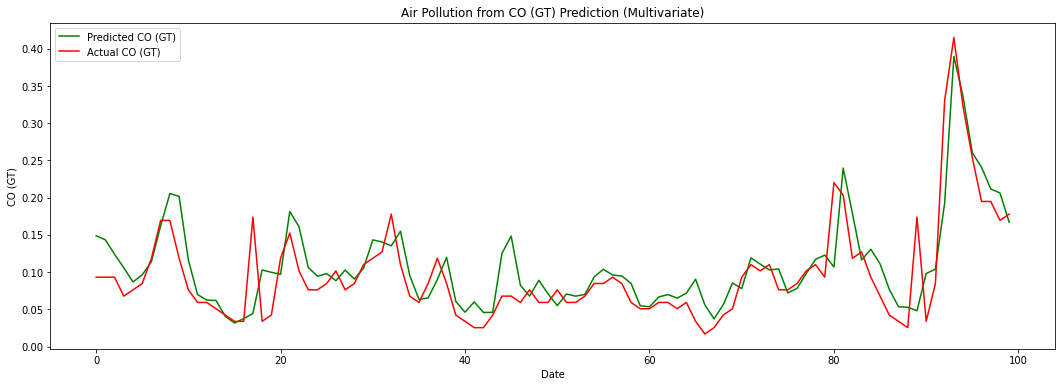

<Figure size 432x288 with 0 Axes>

In [49]:
#Plot the graph between actual vs predicted values
plt.figure(figsize=(18,6))  
plt.plot(Y_pred_b[-100:,:], color= 'green',label = 'Predicted CO (GT)')
plt.plot(Y_test[-100:,:] , color = 'red',label = 'Actual CO (GT)')
plt.title("Air Pollution from CO (GT) Prediction (Multivariate)")
plt.xlabel("Date")
plt.ylabel("CO (GT)")
plt.legend()
plt.show()
plt.savefig('graph.png')
